# Movie Revenue Prediction
***

## Table of Contents
***

### The Problem
- [What is the business problem?](#problem)
- [Approach and steps](#approach)

### Exploratory Data Analysis
- [Data Quality Check](#eda1)
- [Revenue VS Language](#eda2)
- [Revenue VS Relaese Dates](#eda3)
- [Correlation Matrix](#eda4)
- [Revenue vs budget/ runtime](#eda5)

### Drop Features

### Linear Regression
- [Simple Linear Regression with two variables](#LR1)
- [Splitting the Data into Train/Test Sets](#LR2)
- [Data Visualization (Actual VS Predicted Values)](#LR3)
- [Regression Metrics (R-square, MSE)](#LR4)

### Data pre-processing
- [Handle the missing values](#DPP1)
- [Encoding the categorical variable](#DPP2)

### Selection of Features
- [Backward Elimination Process](#SF1)
- [OLS Summary Analysis](#SF2)

### Conclusion

<a id='problem'></a>
## The Problem:
***

A movie studio needs to be able to predict movie revenue in order to greenlight the project and assign a budget to it. 

While the budget for the movie is known in the dataset it is often an unknown variable during the greenlighting process.


<a id='approach'></a>
### Approach and steps:


As the dataset contains a huge number of features. We need to figure out the correlation between these independent variables with the dependent variable (Revenue) which has a continuous values. My approach is to predict these values using a regression model that would help me predict and give the relationship between the variables.

Steps Taken:

1. Find the correlation between the independent and dependent variable
2. Handle the missing data
3. Data pre- processing
4. Split train/test data
5. Apply to the model
6. Evaluate the model


### Import Packages
***

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis
***

In [2]:
# Load dataset
movie_ds = pd.read_csv("../Movie_Prediction_Analysis/movie_revenue_predictions.csv")
movie_ds.head()

,title,tagline,revenue,budget,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
2,Spectre,A Plan No One Escapes,880674609,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/15,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released
3,The Dark Knight Rises,The Legend Ends,1084939099,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/12,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released
4,John Carter,"Lost in our world, found in another.",284139100,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/12,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released


In [3]:
movie_ds.shape

(4803, 16)

In [4]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
title                   4803 non-null object
tagline                 3959 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
overview                4800 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 600.5+ KB


<a id='eda1'></a>
### Data Quality Check

In [5]:
movie_ds.isnull().any()

title                   False
tagline                  True
revenue                 False
budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
overview                 True
production_companies    False
production_countries    False
release_date             True
runtime                  True
spoken_languages        False
status                  False
dtype: bool

<a id='eda2'></a>
### Revenue VS Language

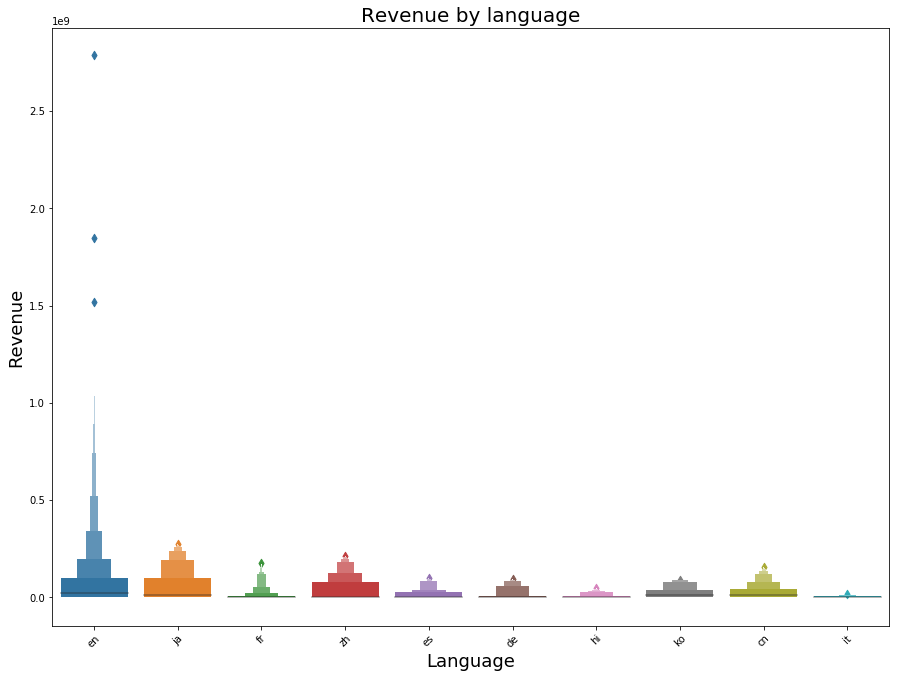

In [6]:
#How language contributes to revenue
plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue', 
                   data=movie_ds[(movie_ds['original_language'].isin((movie_ds['original_language'].sort_values().value_counts()[:10].index.values)))])
g1.set_title("Revenue by language", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()

#### The languages en, ja, zh are the leading contributor in the revenue of the movies

<a id='eda3'></a>
### Revenue VS Release Date

In [7]:
#Check how revenue depends of day
movie_ds['release_date'] = pd.to_datetime(movie_ds['release_date'])

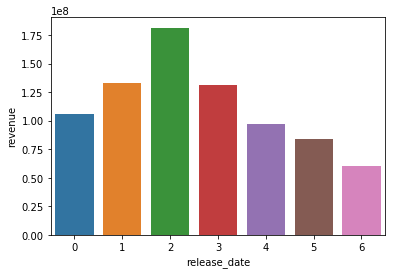

In [8]:
release_day = movie_ds['release_date'].value_counts().sort_index()
release_day_revenue = movie_ds.groupby(['release_date'])['revenue'].sum()
release_day_revenue.index = release_day_revenue.index.dayofweek
sns.barplot(release_day_revenue.index,release_day_revenue, data = movie_ds,ci=None)
plt.show()

<a id='eda4'></a>
### Creating a correlation matrix for the columns

,revenue,budget,id,runtime
revenue,1.000000,0.730823,-0.050425,0.251093
budget,0.730823,1.000000,-0.089377,0.269851
id,-0.050425,-0.089377,1.000000,-0.153536
runtime,0.251093,0.269851,-0.153536,1.000000


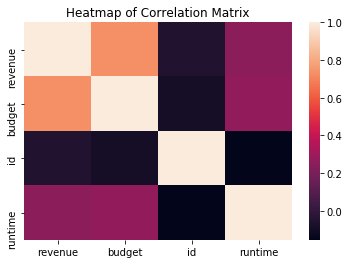

<Figure size 1440x720 with 0 Axes>

In [9]:
 # Create a correlation matrix.
corr = movie_ds.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

plt.figure(figsize=(20,10))

corr

<a id='eda5'></a>
### Revenue VS Budget

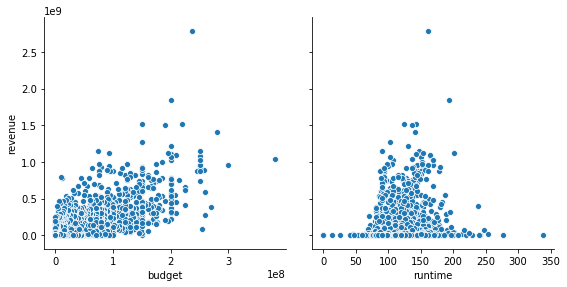

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(movie_ds, x_vars=['budget', 'runtime'], y_vars='revenue', height=4, aspect=1)

## Drop Features
***

As some of the columns/features are irrelevant and have a lot of missing values as well and would not contribute to our analysis, therefore we can drop those columns to focus of relevant features for prediction.

In [11]:
movie_ds.drop(['title','tagline','genres','homepage','id','keywords','overview','production_companies','production_countries',
              'release_date', 'spoken_languages'],axis=1,inplace=True)

In [12]:
movie_ds.isnull().any()

revenue              False
budget               False
original_language    False
runtime               True
status               False
dtype: bool

## Linear Regression
***

<a id='LR1'></a>
### Independent Variable (Budget) Vs Dependent Variable (Revenue)

In [13]:
### SCIKIT-LEARN ###

# create X and Y
#feature_cols = ['budget']
X_ind = movie_ds.iloc[:,1:2].values
Y_dep = movie_ds.iloc[:,0:1].values


<a id='LR2'></a>
### Splitting the dataset into training set and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ind, Y_dep, test_size = 0.20, random_state = 0)

### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
It takes the following form:
y=β0+β1x 
What does each term represent?

y  is the response
x  is the feature
β0  is the intercept
β1  is the coefficient for x

β0  and  β1  are called the model coefficients
***

In [15]:
## Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
## Predicting the test set result
Y_pred = regressor.predict(X_test)

<a id='LR3'></a>
### Data Visualization (Actual VS Predicted Values)

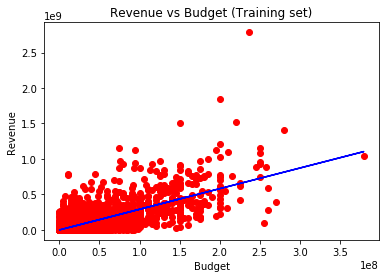

In [17]:
# Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Budget (Training set)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

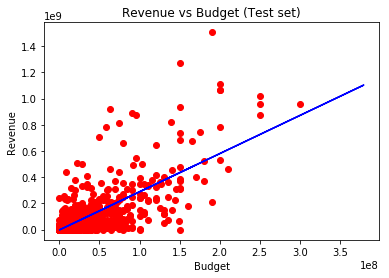

In [18]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Budget (Test set)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

<a id='LR4'></a>
### Regression Metrics (R-square, MSE)

In [19]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
#from sklearn.metrics import explained_variance_score
print('The r-squared value is:',r2_score(Y_test, Y_pred))
print('The explained variance score is:',explained_variance_score(Y_test, Y_pred))
print('The MAE is:',mean_absolute_error(Y_test, Y_pred))
print('The MSE is:',mean_squared_error(Y_test, Y_pred))


The r-squared value is: 0.5416677030307677
The explained variance score is: 0.5417080767079132
The MAE is: 57711721.8289766
The MSE is: 1.2622772248139182e+16


## Data pre-processing
***

Assign two variables one the independent variable that contains all the features and second the dependent variable that contains the values that need to be predicted

In [20]:
X = movie_ds.iloc[:,1:].values
y = movie_ds.iloc[:, 0].values

In [21]:
X

array([[237000000, 'en', 162.0, 'Released'],
       [300000000, 'en', 169.0, 'Released'],
       [245000000, 'en', 148.0, 'Released'],
       ...,
       [0, 'en', 120.0, 'Released'],
       [0, 'en', 98.0, 'Released'],
       [0, 'en', 90.0, 'Released']], dtype=object)

<a id='DPP1'></a>
### Handle the missing values

In [22]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,2:3])
X[:,2:3] = imputer.transform(X[:,2:3])

<a id='DPP2'></a>
### Encoding the categorical variable 

In [23]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [1,3])
X = onehotencoder.fit_transform(X).toarray()

## Multiple Linear Regression
***

## Selection of Features
***

In [24]:
X.shape

(4803, 42)

<a id='SF1'></a>
### Backward Elimination Process

In [25]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((4803,1)).astype(int), values= X, axis = 1)
X

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.37e+08, 1.62e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 3.00e+08, 1.69e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.45e+08, 1.48e+02],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.20e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 9.80e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 9.00e+01]])

### Orinary Least Square (OLS) Summary Analysis

In [26]:
X_opt = X[:,0:43]
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:09:13   Log-Likelihood:                -95779.
No. Observations:                4803   AIC:                         1.916e+05
Df Residuals:                    4762   BIC:                         1.919e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.451e+07   2.33e+07     -1.480      0.139   -8.02e+07    1.12e+07
x1          1.143e+07   1.09e+08      0.105      0.916   -2.02e+08    2.25e+08
x2          1.098e+07   7.76e+07      0.141      0.888   -1.41e+08    1.63e+08
x3          8.581e+06   3.38e+07      0.254      0.799   -5.76e+07    7.48e+07
x4          4.863e+06   8.46e+07      0.057      0.954   -1.61e+08    1.71e+08
x5          2.996e+05   4.29e+07      0.007      0.994   -8.37e+07    8.43e+07
x6         -6.494e+06   2.45e+07     -0.266      0.791   -5.44e+07    4.14e+07
x7          1.022e+07   1.09e+08      0.094      0.925   -2.03e+08    2.24e+08
x8          4.457e+06    1.3e+07      0.344      0.731   -2.09e+07    2.99e+07
x9          5.522e+06    2.3e+07      0.240      0.810   -3.96e+07    5.07e+07
x10         6.049e+06   5.56e+07      0.109      0.913   -1.03e+08    1.15e+08
x11        -6.451e+06   1.82e+07     -0.354      0.723   -4.22e+07    2.93e+07
x12         5.831e+06   6.38e+07      0.091      0.927   -1.19e+08    1.31e+08
x13         -6.73e+06    2.8e+07     -0.240      0.810   -6.17e+07    4.82e+07
x14        -9.878e+06   1.09e+08     -0.091      0.928   -2.24e+08    2.04e+08
x15         3.304e+06   7.76e+07      0.043      0.966   -1.49e+08    1.55e+08
x16         1.402e+07   1.09e+08      0.129      0.898      -2e+08    2.28e+08
x17        -3.983e+06   3.16e+07     -0.126      0.900    -6.6e+07     5.8e+07
x18         2.298e+07   2.99e+07      0.768      0.443   -3.57e+07    8.17e+07
x19        -1.821e+07   3.51e+07     -0.519      0.603    -8.7e+07    5.05e+07
x20        -7.706e+06   1.09e+08     -0.071      0.944   -2.21e+08    2.06e+08
x21         3.728e+05   1.09e+08      0.003      0.997   -2.13e+08    2.14e+08
x22        -1.478e+07   5.56e+07     -0.266      0.790   -1.24e+08    9.42e+07
x23         1.111e+07   1.09e+08      0.102      0.919   -2.03e+08    2.25e+08
x24         2.073e+07   1.09e+08      0.190      0.849   -1.93e+08    2.34e+08
x25         1.475e+07   1.09e+08      0.135      0.892   -1.99e+08    2.28e+08
x26         3.998e+06   3.83e+07      0.104      0.917    -7.1e+07     7.9e+07
x27         3.184e+06   7.76e+07      0.041      0.967   -1.49e+08    1.55e+08
x28        -3.011e+07   3.51e+07     -0.859      0.390   -9.88e+07    3.86e+07
x29         1.489e+07   1.09e+08      0.137      0.891   -1.99e+08    2.29e+08
x30        -1.502e+07   5.01e+07     -0.300      0.764   -1.13e+08    8.31e+07
x31        -1.965e+07   7.77e+07     -0.253      0.800   -1.72e+08    1.33e+08
x32        -3.223e+07   1.09e+08     -0.296      0.768   -2.46e+08    1.81e+08
x33         -7.43e+06   6.38e+07     -0.116      0.907   -1.32e+08    1.18e+08
x34        -3.058e+07   1.09e+08     -0.281      0.779   -2.44e+08    1.83e+08
x35        -1.077e+07   1.09e+08     -0.099      0.921   -2.24e+08    2.03e+08
x3

###### Backward Elimination Process to select independepent variables

In [27]:

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

In [28]:
SL = 0.05
X_opt = X[:, 0:43]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2786.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:09:13   Log-Likelihood:                -95781.
No. Observations:                4803   AIC:                         1.916e+05
Df Residuals:                    4800   BIC:                         1.916e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.555e+07   7.78e+06     -5.852      0.0

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Modeled, y, test_size = 0.2, random_state = 0)

In [30]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Predicting the Test set results
y_pred2 = regressor.predict(X_test2)

In [32]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
#from sklearn.metrics import explained_variance_score
print('The r-squared value is:',r2_score(y_test2, y_pred2))
print('The explained variance score is:',explained_variance_score(y_test2, y_pred2))
print('The MAE is:',mean_absolute_error(y_test2, y_pred2))
print('The MSE is:',mean_squared_error(y_test2, y_pred2))

The r-squared value is: 0.5443409299563824
The explained variance score is: 0.5443910456788785
The MAE is: 58941658.310919076
The MSE is: 1.2549149824249878e+16


## Conclusion
***